## Predicting the Parkinson Disease

####  This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. 

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data
df=pd.read_csv("parkinson.csv")

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
#shape
df.shape

(195, 24)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null float64
PPE                 195 non-null f

In [5]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [6]:
#checking if there any null values
df.isnull().sum()   #impressive no nulls.

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
90%,209.891000,261.003000,187.875800,0.009882,0.000080,0.005400,0.005712,0.016202,0.055926,0.532000,...,0.090350,0.052348,26.509400,1.000000,0.637479,0.789799,-4.256362,0.338407,2.922228,0.334078
95%,236.507800,410.639800,220.194900,0.015561,0.000100,0.008756,0.009083,0.026271,0.067256,0.652700,...,0.108678,0.092044,26.974200,1.000000,0.653220,0.816038,-3.733614,0.373139,3.084931,0.369571
99%,245.926700,586.684060,232.772200,0.030168,0.000164,0.018032,0.016323,0.054107,0.091925,0.935280,...,0.161088,0.219660,31.789120,1.000000,0.671723,0.823579,-2.924002,0.415932,3.323350,0.454890


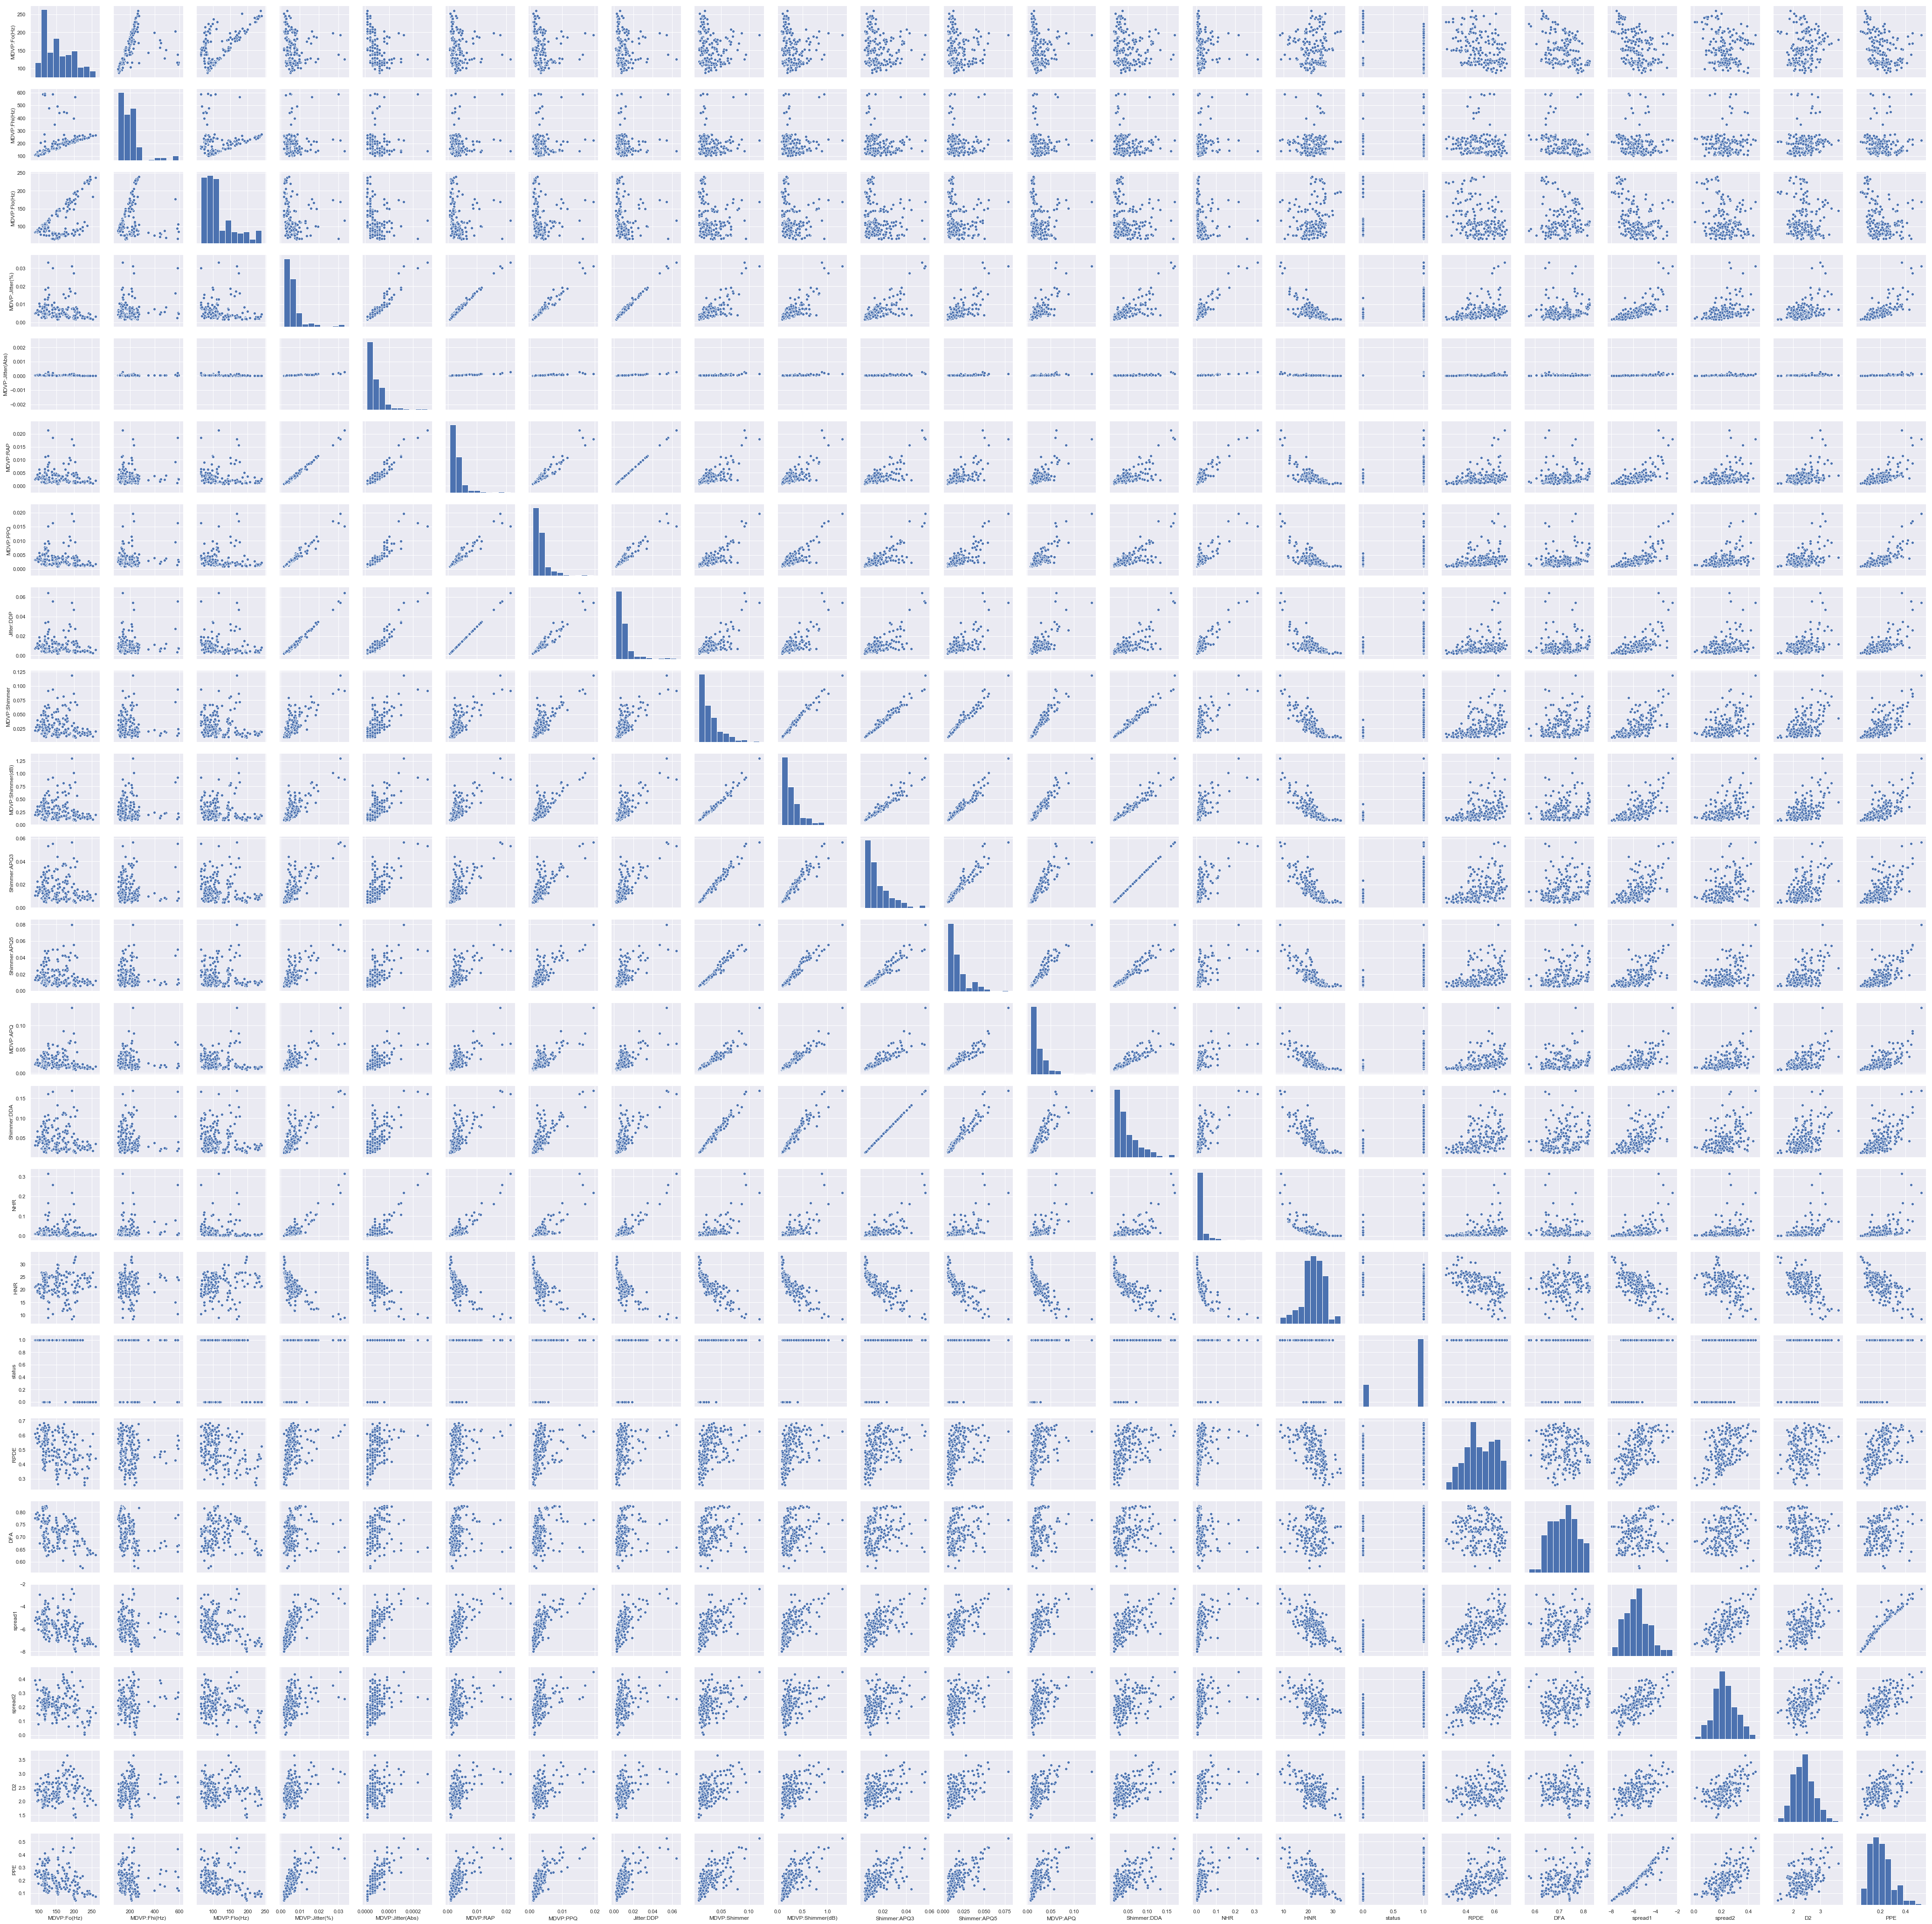

In [8]:
#pair plot
sns.set()
sns.pairplot(df)    #multicollinearity exists

In [9]:
#Dropping the name column
df = df.drop(labels = "name", axis = 1)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
raw=df

In [11]:
target=raw["status"]

In [12]:
#Dropping the target column
df = df.drop(labels = "status", axis = 1)

In [13]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Scaling the dataframe

In [14]:
from scipy.stats import zscore
z_data= df.apply(zscore)
z_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


In [15]:
#Adding the target variable to z_data
z_data["status"]=target

In [16]:
z_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886,1
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605,1
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661,1
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954,1
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082,1


### Spliting train test    70:30 ratio

In [17]:
#importing packages
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [25]:
features = z_data.iloc[:,0:22]
label = z_data["status"]

In [24]:
features.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)

## Decision Tree classifier without PCA and Smote techniques

In [50]:
#lets use decision tree without upsampling
DTClassifier= DecisionTreeClassifier (max_depth=9, min_samples_split =3,criterion='gini',min_samples_leaf=9)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
predicted_labels = DTClassifier.predict(X_test)

In [52]:
#confusion matrix and accuracy
model_score = DTClassifier.score(X_test, y_test)
print(model_score)

0.8305084745762712


## Random Forest classifier without PCA and Smote

In [53]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 650, random_state=1)
rfcl = rfcl.fit(X_train, y_train)

In [54]:
predicted_labels2 = rfcl.predict(X_test)
metrics.accuracy_score(predicted_labels2,y_test)

0.9322033898305084

## Lets use PCA (dimentional Reduction)

In [34]:
## Lets use pCA
from sklearn.decomposition import PCA
pca = PCA(n_components=22, svd_solver='full')

In [35]:
pca.fit(X_train) # only features
print(pca.explained_variance_ratio_) 

[6.08723194e-01 9.94423520e-02 7.20477645e-02 6.51298903e-02
 4.26772267e-02 3.50708258e-02 2.38286057e-02 1.49310301e-02
 1.17485183e-02 8.99549669e-03 6.16949273e-03 4.23287709e-03
 2.93457817e-03 1.40265756e-03 8.64356772e-04 7.63851474e-04
 5.45349589e-04 2.83339034e-04 1.66880668e-04 4.16969021e-05
 1.48515403e-08 1.43461338e-09]


In [36]:
#cummulative sum
pca.explained_variance_ratio_.cumsum()

array([0.60872319, 0.70816555, 0.78021331, 0.8453432 , 0.88802043,
       0.92309125, 0.94691986, 0.96185089, 0.97359941, 0.9825949 ,
       0.9887644 , 0.99299727, 0.99593185, 0.99733451, 0.99819887,
       0.99896272, 0.99950807, 0.99979141, 0.99995829, 0.99999998,
       1.        , 1.        ])

In [ ]:
# 8 feature explains the 96% of variance

In [58]:
pca = PCA(n_components=12)
pca_data=pca.fit_transform(X_train)
pca_data# all

array([[ 6.99298372,  3.63958737,  0.85490838, ..., -0.23944745,
         0.29750391,  0.04389554],
       [-1.70534968,  0.29475211,  1.28275391, ..., -0.27946837,
        -0.07595568, -0.38564145],
       [ 0.53355683, -2.37803392,  0.38838531, ...,  0.14753958,
        -0.28377867,  0.02358754],
       ...,
       [-0.80738147,  0.05345976, -2.59004308, ..., -0.07865711,
        -0.09121923,  0.42817825],
       [-3.8428278 ,  2.30387385, -0.52962186, ...,  0.76011035,
         0.13357461,  0.77483924],
       [-2.76978114, -1.43459603,  0.55394221, ...,  0.00753349,
         0.06978913, -0.35422401]])

In [59]:
pca_data1=pca.fit_transform(X_test)
pca_data1# all

array([[-9.05893836e-01, -2.30098194e+00, -2.24947888e-02,
        -1.19903143e+00, -2.80218266e-01,  4.38734134e-01,
        -8.90254318e-01, -6.47749976e-01, -8.32589737e-02,
         1.53825770e-01,  1.60140592e-01,  2.79710278e-01],
       [-3.10428448e+00, -5.02404913e-01, -7.99040583e-01,
        -6.66605648e-01,  2.21567779e-01, -1.42779299e-01,
        -1.26465144e-01,  8.70023056e-01,  4.20924676e-01,
        -2.21083188e-01, -1.25429917e-01,  3.63721344e-02],
       [-5.28546612e+00,  1.74590969e-01,  1.33932721e+00,
        -2.47651935e-01, -4.98212479e-01, -8.08473826e-01,
         1.40952064e+00, -2.06420672e-01,  6.60462388e-01,
         5.77322616e-01,  1.22526809e-01,  2.45596033e-01],
       [-1.95471310e+00,  1.37372366e+00,  5.46276682e-01,
         1.02323531e+00,  4.44481962e-01, -8.45700381e-01,
        -3.28907782e-03, -2.65461026e-01, -3.46767004e-01,
         6.23882824e-02,  2.73643701e-01, -2.69200419e-01],
       [-2.31532539e+00, -1.73408527e+00,  3.7761819

In [60]:
#convert above array to dataframe
X_train_pca = pd.DataFrame(data = pca_data)
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,6.992984,3.639587,0.854908,-0.399582,-2.045179,2.697679,0.335520,-0.059690,-0.658715,-0.239447,0.297504,0.043896
1,-1.705350,0.294752,1.282754,0.790555,-0.431667,0.054423,-0.525917,-0.014389,-0.122360,-0.279468,-0.075956,-0.385641
2,0.533557,-2.378034,0.388385,1.350777,-0.653690,0.300497,0.489577,-1.150939,-0.333322,0.147540,-0.283779,0.023588
3,0.268567,-0.987030,-0.312628,-0.283352,1.203338,-0.579867,1.201720,-0.203394,0.071979,-0.068653,0.528978,-0.349130
4,-1.032090,-0.048639,-1.945008,-1.024178,0.254481,0.938348,0.614152,-0.312967,0.317412,-0.106616,0.230915,-0.244956


In [61]:
X_test_pca = pd.DataFrame(data = pca_data1)
X_test_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.905894,-2.300982,-0.022495,-1.199031,-0.280218,0.438734,-0.890254,-0.647750,-0.083259,0.153826,0.160141,0.279710
1,-3.104284,-0.502405,-0.799041,-0.666606,0.221568,-0.142779,-0.126465,0.870023,0.420925,-0.221083,-0.125430,0.036372
2,-5.285466,0.174591,1.339327,-0.247652,-0.498212,-0.808474,1.409521,-0.206421,0.660462,0.577323,0.122527,0.245596
3,-1.954713,1.373724,0.546277,1.023235,0.444482,-0.845700,-0.003289,-0.265461,-0.346767,0.062388,0.273644,-0.269200
4,-2.315325,-1.734085,0.037762,0.831951,-0.155451,0.038684,-0.081550,0.085568,0.755202,-0.090041,-0.017485,0.075628


## Decision Tree classifier after PCA

In [68]:
DTClassifier= DecisionTreeClassifier (max_depth=9, min_samples_split =3,criterion='gini',min_samples_leaf=9)
DTClassifier.fit(X_train_pca,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
predicted_labels = DTClassifier.predict(X_test_pca)

In [72]:
#confusion matrix and accuracy
model_score = DTClassifier.score(X_test_pca, y_test)
print(model_score)

0.8983050847457628


## Random forest classifier after PCA

In [62]:
rfcl = RandomForestClassifier(n_estimators = 650, random_state=1)
rfcl = rfcl.fit(X_train_pca, y_train)

In [63]:
predicted_labels2 = rfcl.predict(X_test_pca)
metrics.accuracy_score(predicted_labels2,y_test)

0.864406779661017

In [64]:
#lets check if there any class imbalance

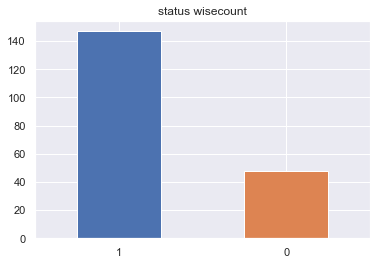

In [48]:
raw.status.value_counts().plot(kind="bar",rot = 0, title='status wisecount')

## Using SMOTE to upsample lower class

In [55]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 101
Before UpSampling, counts of label '0': 35 

After UpSampling, counts of label '1': 101
After UpSampling, counts of label '0': 101 

After UpSampling, the shape of train_X: (202, 22)
After UpSampling, the shape of train_y: (202,) 



In [56]:
X_train_res.shape

(202, 22)

In [57]:
y_train_res.shape

(202,)

## Decision Tree classifier After upsampling

In [73]:
DTClassifier= DecisionTreeClassifier (max_depth=9, min_samples_split =3,criterion='gini',min_samples_leaf=9)
DTClassifier.fit(X_train_res,y_train_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
predicted_labels = DTClassifier.predict(X_test)

In [75]:
metrics.accuracy_score(predicted_labels,y_test)

0.8813559322033898

## Random forest classifier after Upsampling

In [76]:
rfcl = RandomForestClassifier(n_estimators = 650, random_state=1)
rfcl = rfcl.fit(X_train_res, y_train_res)

In [77]:
predicted_labels2 = rfcl.predict(X_test)
metrics.accuracy_score(predicted_labels2,y_test)   #impressive great result after smoting

0.9491525423728814

#### Lets use another classifier models

## Logestic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_pca, y_train)
y_predict = model.predict(X_test_pca)
model_score = model.score(X_test_pca, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.8305084745762712
[[ 8  5]
 [ 5 41]]


C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [98]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.62      0.62      0.62        13
           1       0.89      0.89      0.89        46

   micro avg       0.83      0.83      0.83        59
   macro avg       0.75      0.75      0.75        59
weighted avg       0.83      0.83      0.83        59



## Logestic Regression for upsampled data

In [101]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train_res, y_train_res)
y_predict1 = model1.predict(X_test)
model_score = model1.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict1))    #poor performance

0.7627118644067796
[[ 9  4]
 [10 36]]


C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.47      0.69      0.56        13
           1       0.90      0.78      0.84        46

   micro avg       0.76      0.76      0.76        59
   macro avg       0.69      0.74      0.70        59
weighted avg       0.81      0.76      0.78        59



## KNN classifier

In [122]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 10 , weights = 'uniform', metric='euclidean',p=3)
NNH.fit(X_train,y_train)
predicted_labels = NNH.predict(X_test)
accuracy_score_knn= accuracy_score(y_test, predicted_labels)
print(accuracy_score_knn)

0.8983050847457628


In [105]:
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.92      0.96      0.94        46

   micro avg       0.90      0.90      0.90        59
   macro avg       0.87      0.82      0.84        59
weighted avg       0.89      0.90      0.90        59



## KNN classfier for upsampled data

In [121]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 10 , weights = 'uniform', metric='euclidean',p=3)
NNH.fit(X_train_res,y_train_res)
predicted_labels1 = NNH.predict(X_test)
accuracy_score_knn= accuracy_score(y_test, predicted_labels1)
print(accuracy_score_knn)     #no improvement

0.864406779661017


In [108]:
print(classification_report(y_test,predicted_labels1))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76        13
           1       1.00      0.83      0.90        46

   micro avg       0.86      0.86      0.86        59
   macro avg       0.81      0.91      0.83        59
weighted avg       0.92      0.86      0.87        59



## Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train,y_train)

In [110]:
predicted_labels = gnb.predict(X_test)
accuracy_score_knn= accuracy_score(y_test, predicted_labels)
accuracy_score_knn     # very poor score

0.6779661016949152

In [111]:
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        13
           1       1.00      0.59      0.74        46

   micro avg       0.68      0.68      0.68        59
   macro avg       0.70      0.79      0.66        59
weighted avg       0.87      0.68      0.70        59



## Naive Bayes on upsampled data

In [112]:
gnb = GaussianNB()
gnb = gnb.fit(X_train_res,y_train_res)

In [113]:
predicted_labels = gnb.predict(X_test)
accuracy_score_knn= accuracy_score(y_test, predicted_labels)
accuracy_score_knn 

0.711864406779661

In [114]:
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        13
           1       1.00      0.63      0.77        46

   micro avg       0.71      0.71      0.71        59
   macro avg       0.72      0.82      0.69        59
weighted avg       0.88      0.71      0.74        59



In [115]:
tn, fp, fn, tp = confusion_matrix(y_test,predicted_labels).ravel()

#### Out of three models KNN with and without upsampling gives the best accuracy

## ROC curve

In [135]:
#creating a roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

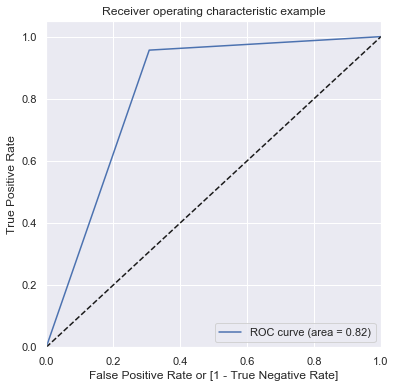

(array([0.        , 0.30769231, 1.        ]),
 array([0.        , 0.95652174, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [123]:
#ROC curve for KNN Model
draw_roc( y_test,  predicted_labels )

### K-cross validation on KNN

In [180]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
knn = KNeighborsClassifier()
scores = cross_val_score(knn, features, label, cv=10, scoring='accuracy')
print(scores)

[0.65       0.9        0.85       0.85       0.95       0.9
 0.65       0.63157895 0.77777778 0.77777778]


## Boosting and Bagging techniques

- c)	Optimize the model (best model picked in ‘b’) with boosting technique and observe the validation score.

#### Bagging 

In [130]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True , random_state=100)
bgcl = bgcl.fit(X_train_res,y_train_res)


In [131]:
#accuracy for test
test_pred= bgcl.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,test_pred)
print(accuracy_score)

0.9152542372881356


- Before upsampling

In [133]:
#without upsampling
from sklearn.ensemble import BaggingClassifier
bgcl1 = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True , random_state=100)
bgcl1 = bgcl1.fit(X_train,y_train)


In [134]:
#accuracy for test
test_pred= bgcl1.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,test_pred)
print(accuracy_score)

0.9322033898305084


#### Boosting

- AdaBoosting

In [154]:
DTClassifier= DecisionTreeClassifier (max_depth=9, min_samples_split =3,criterion='gini',min_samples_leaf=2)

In [155]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=DTClassifier, n_estimators=50, random_state=1)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(X_train,y_train)

In [162]:
#accuracy for test
test_pred= abcl.predict(X_test)


In [163]:
abcl.score(X_test ,y_test)   #great score

0.9661016949152542

In [164]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.96      0.98        46

   micro avg       0.97      0.97      0.97        59
   macro avg       0.93      0.98      0.95        59
weighted avg       0.97      0.97      0.97        59



- after upsampling

In [165]:
#### after upsampling
from sklearn.ensemble import AdaBoostClassifier
abcl1 = AdaBoostClassifier(base_estimator=DTClassifier, n_estimators=100, random_state=1)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl1 = abcl1.fit(X_train_res,y_train_res)    #intretsing, score gotten increased by 96.6

In [166]:
test_pred1= abcl1.predict(X_test)

In [161]:
abcl1.score(X_test ,y_test) 

0.9661016949152542

In [167]:
print(classification_report(y_test,test_pred1))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.96      0.98        46

   micro avg       0.97      0.97      0.97        59
   macro avg       0.93      0.98      0.95        59
weighted avg       0.97      0.97      0.97        59



#### GradientBoost

In [176]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state=5)
gbcl = gbcl.fit(X_train,y_train)

In [177]:
test_pred2 = gbcl.predict(X_test)
gbcl.score(X_test ,y_test)

0.9661016949152542

#### Out of bagging and boosting,boosting gave a best accuracy of 96.6%

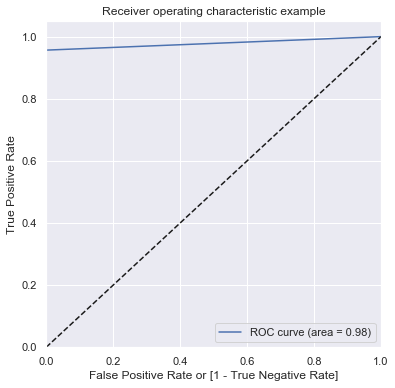

(array([0., 0., 1.]),
 array([0.        , 0.95652174, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [179]:
draw_roc( y_test,test_pred2 )   #great (AUC)area under the curve is 98%

In [ ]:
##Boosting improved the performance of 96.6 %

In [ ]:
##Bagging and boosting both increased the performance then accuracy score made by  Naive,KNN and logestic models

In [ ]:
## out of bagging and boosting,boosting got the best accuracy

- g)	Compare and Contrast both bagging and booting technique over the best model selected during the step ‘b’ with Bias and Variance Error using 5-fold Cross Validation Score.

In [ ]:
## Bagging and boosting techniques improved a accuracy score then the score made by any of the above models.
## the first 3 models didnt even cross 90 % accuracy but bagging and boosting did.

### Random search CV on Random Forest

In [181]:
import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [184]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 100)
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5,  
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.7s finished
C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [185]:
#best hyper parameters
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

- after upsampling

In [186]:
best_random = rf_random.best_estimator_
best_random= best_random.fit(X_train_res, y_train_res)

In [187]:
predicted_labels3 = best_random.predict(X_test)
metrics.accuracy_score(predicted_labels3,y_test)   #no improvement

0.9322033898305084

- before upsampling

In [188]:
#before upsampling
best_random1 = rf_random.best_estimator_
best_random1= best_random1.fit(X_train, y_train)

In [189]:
predicted_labels4 = best_random1.predict(X_test)
metrics.accuracy_score(predicted_labels4,y_test)    

0.9491525423728814

## Gridsearch CV

In [190]:
from sklearn.model_selection import GridSearchCV

In [191]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

In [193]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [194]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

- after upsampling

In [198]:
#after upsampling
grid_search1 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
grid_search1.fit(X_train_res, y_train_res);

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [199]:
predicted_labels5 = grid_search1.predict(X_test)
metrics.accuracy_score(predicted_labels5,y_test)   #very bad score

0.8813559322033898

- before upsampling

In [201]:
grid_search.fit(X_train, y_train)
predicted_labels6 = grid_search.predict(X_test)
metrics.accuracy_score(predicted_labels6,y_test)

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9322033898305084

- best model i suggest is

In [202]:
## Finally the best model i suggest is
from sklearn.ensemble import GradientBoostingClassifier
gbcl2 = GradientBoostingClassifier(n_estimators = 50, random_state=1)
gbcl2 = gbcl2.fit(X_train, y_train)

In [204]:
predicted_labels10 = gbcl2.predict(X_test)
metrics.accuracy_score(predicted_labels10,y_test)

0.9661016949152542

In [211]:
#classification report
print(classification_report(y_test,predicted_labels10))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.96      0.98        46

   micro avg       0.97      0.97      0.97        59
   macro avg       0.93      0.98      0.95        59
weighted avg       0.97      0.97      0.97        59



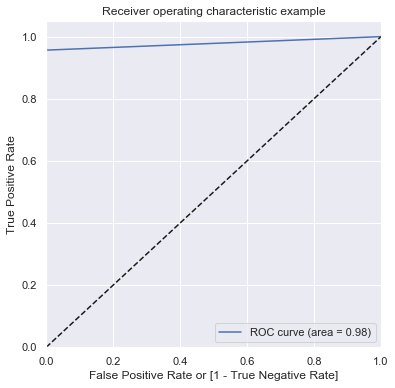

(array([0., 0., 1.]),
 array([0.        , 0.95652174, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [213]:
# ROC curve
draw_roc( y_test,predicted_labels10)      ## AUC (area under the curve) =98%   #not bad

In [206]:
#necessary imports
from sklearn import model_selection
from sklearn.utils import resample
from sklearn import metrics

In [208]:
values = z_data.values

n_iterations = 50    # Number of bootstrap samples to create
n_size = int(len(z_data) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	gbmTree = GradientBoostingClassifier(n_estimators=50)
	gbmTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test1 = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = gbmTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = gbmTree.score(test[:, :-1] , y_test1)

	stats.append(score)

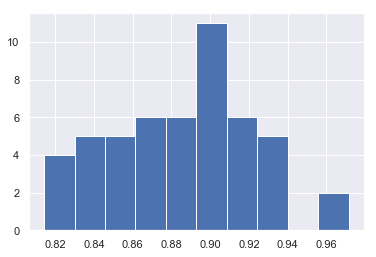

95.0 confidence interval 82.8% and 95.3%


In [209]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

- h)	Give your final inference, which optimization technique (Bagging/Boosting) would be chosen while the best model picked in step ‘b’, is going for production system.

##### I would like to suggest gradient boosting model  to the production as it giving a  accuracy of 96.6% level

In [ ]:
## With 95% confidence level i can say the accuracy level lies in between 82% to 96% in the production